# Fine tune YOLOv8

## Prepare Dataset

In [1]:
!gdown 1sX9qmlPY1SXwboz9qOzjyLrkzCwYoT31

Downloading...
From (original): https://drive.google.com/uc?id=1sX9qmlPY1SXwboz9qOzjyLrkzCwYoT31
From (redirected): https://drive.google.com/uc?id=1sX9qmlPY1SXwboz9qOzjyLrkzCwYoT31&confirm=t&uuid=d2520e52-0193-4e0d-a7f4-fab847f60c21
To: /content/cars_yolo_data.zip
100% 37.7M/37.7M [00:00<00:00, 64.0MB/s]


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/cars_yolo_data.zip

## Import Libraries

In [7]:
!pip install ultralytics
import ultralytics # For yolo v8
ultralytics.checks()

Ultralytics YOLOv8.2.17 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.9/78.2 GB disk)


In [8]:
import os
import cv2
import numpy as np
import json
import matplotlib.pyplot as plt
from ultralytics import YOLO

## Load data

In [9]:
data_yaml_path = '/content/yolo_data/data.yml'
print(type(data_yaml_path))

<class 'str'>


## Fine-tune

In [10]:
model = YOLO('yolov8s.pt')

100%|██████████| 21.5M/21.5M [00:00<00:00, 91.8MB/s]


In [11]:
epochs = 10
imgsz = 640
batch = 16
patience = 5
learning_rate = 0.0005


In [12]:
history = model.train(data=data_yaml_path,
                      epochs=epochs,
                      imgsz=imgsz,
                      batch=batch,
                      patience=patience,
                      lr0=learning_rate,
                      project='yolov8',
                      name='yolov8_history/dectect/train')

Ultralytics YOLOv8.2.17 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/yolo_data/data.yml, epochs=10, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=yolov8, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

100%|██████████| 755k/755k [00:00<00:00, 11.7MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 78.4MB/s]


AMP: checks passed ✅


train: Scanning /content/yolo_data/train/labels... 345 images, 0 backgrounds, 0 corrupt: 100%|██████████| 345/345 [00:01<00:00, 342.17it/s]


train: New cache created: /content/yolo_data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/yolo_data/val/labels... 26 images, 0 backgrounds, 0 corrupt: 100%|██████████| 26/26 [00:00<00:00, 253.44it/s]

val: New cache created: /content/yolo_data/val/labels.cache


Plotting labels to yolov8/yolov8_history/dectect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to yolov8/yolov8_history/dectect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.22G      1.616       4.57      1.274         10        640: 100%|██████████| 22/22 [00:13<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.43s/it]

                   all         26         28       0.39      0.536      0.323      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.17G       1.39      1.374      1.144         16        640: 100%|██████████| 22/22 [00:09<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         26         28      0.154      0.723      0.152     0.0837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.16G      1.369      1.002      1.134         14        640: 100%|██████████| 22/22 [00:06<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]

                   all         26         28      0.432      0.841      0.496       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.13G      1.335     0.8852      1.121         10        640: 100%|██████████| 22/22 [00:07<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         26         28      0.393      0.607      0.461      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.12G      1.317     0.8374      1.104         12        640: 100%|██████████| 22/22 [00:08<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         26         28      0.387      0.786      0.513      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.14G      1.295     0.7745       1.12         14        640: 100%|██████████| 22/22 [00:08<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         26         28      0.376      0.839      0.455      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.12G      1.252     0.6758        1.1         12        640: 100%|██████████| 22/22 [00:06<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         26         28      0.441      0.857      0.493      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.15G      1.219     0.6532      1.085         15        640: 100%|██████████| 22/22 [00:08<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         26         28      0.426      0.929      0.502      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.12G      1.186     0.6329      1.066         18        640: 100%|██████████| 22/22 [00:06<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all         26         28      0.438      0.964      0.473       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.14G      1.154      0.593      1.052         14        640: 100%|██████████| 22/22 [00:07<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all         26         28      0.424      0.893      0.452      0.303



10 epochs completed in 0.030 hours.
Optimizer stripped from yolov8/yolov8_history/dectect/train/weights/last.pt, 22.5MB
Optimizer stripped from yolov8/yolov8_history/dectect/train/weights/best.pt, 22.5MB

Validating yolov8/yolov8_history/dectect/train/weights/best.pt...
Ultralytics YOLOv8.2.17 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]


                   all         26         28      0.426      0.929      0.498      0.336
Speed: 0.1ms preprocess, 3.8ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to yolov8/yolov8_history/dectect/train


## Evaluate Model

In [14]:
model_path = '/content/yolov8/yolov8_history/dectect/train/weights/best.pt'
model = YOLO(model_path)
test_imgs_path = '/content/yolo_data/val/images/vid_4_12140.jpg'
result = model.predict(source=test_imgs_path, save=True)


image 1/1 /content/yolo_data/val/images/vid_4_12140.jpg: 384x640 3 cars, 14.5ms
Speed: 2.2ms preprocess, 14.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2


array([[[252, 223, 179],
        [252, 223, 179],
        [251, 222, 178],
        ...,
        [254, 244, 220],
        [254, 244, 220],
        [254, 244, 220]],

       [[253, 224, 180],
        [252, 223, 179],
        [252, 223, 179],
        ...,
        [253, 243, 219],
        [254, 244, 220],
        [254, 244, 220]],

       [[254, 225, 181],
        [253, 224, 180],
        [253, 224, 180],
        ...,
        [254, 244, 220],
        [254, 244, 220],
        [254, 244, 220]],

       ...,

       [[ 85,  74,  60],
        [ 85,  74,  60],
        [ 88,  75,  61],
        ...,
        [ 88,  74,  56],
        [ 87,  73,  55],
        [ 87,  73,  55]],

       [[ 86,  73,  59],
        [ 87,  74,  60],
        [ 87,  74,  60],
        ...,
        [ 85,  73,  55],
        [ 85,  73,  55],
        [ 85,  73,  55]],

       [[ 87,  74,  60],
        [ 87,  74,  60],
        [ 86,  73,  59],
        ...,
        [ 85,  73,  55],
        [ 85,  73,  55],
        [ 85,  73,  55]]], dtype=uint8)
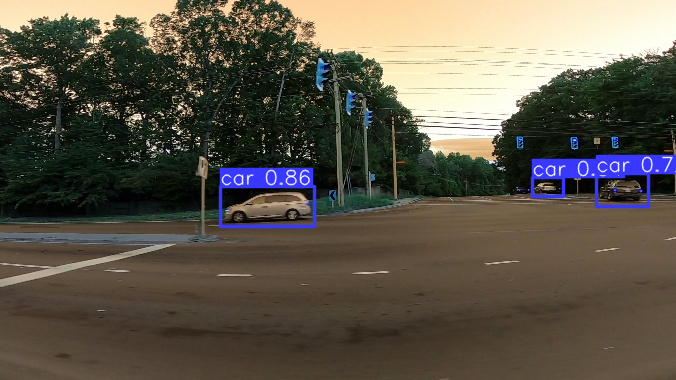

In [24]:
result[0].plot()